In [ ]:
# Hoang Dieu Linh
# 11202127

In [12]:
from numpy import mean,std,cov
from numpy.linalg import eig
import scipy.linalg as la
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# EX2

In [14]:
class PCA:
    # Initialize
    def __init__(self, n_components=None, whiten=False):
        self.n_components = n_components
        self.whiten = bool(whiten)

    # .fit()
    def fit(self, X):
        r,c = X.shape

       # Subtracting mean to center the data/Mean normalization
        self.mn = mean(X,axis=0)
        X = X - self.mn

        # Feature scaling if necessary
        if self.whiten:
            self.stdv = std(X,axis=0)
            X = X/self.stdv

        # MAIN : PERFORMING SVD/EIGEN DECOMPOSITION OF X
        # Step 1:
        A = np.array(X)
        C = cov(A.T)        # Calculating covariance matrix

        # Calculating eigen values and eigen vectors
        self.eigval, self.eigvect = eig(C)

        # Step 2:
        # Truncating for dimensionality reduction
        if self.n_components is not None:
            self.eigval = self.eigval[:self.n_components]
            self.eigvect = self.eigvect[:, :self.n_components]

        # Step 3:
        # Sorting the eigen values and vectors in descending order
        desc_ord = np.flip(np.argsort(self.eigval))    # Indices returned are for ascending order. Flipping to return indices in descending order.
        self.eigval = self.eigval[desc_ord]
        self.eigvect = self.eigvect[:, desc_ord]
        
        return self

    # Transforming the original matrix(of features) to the reduced form.
    # .transform()
    def transform(self, X):
        X = X - self.mn
        if self.whiten:
            X = X/self.stdv
        return X @ self.eigvect           # Step 4

# EX3

In [15]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
df

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [17]:
X = df.drop(['target'],axis=1)
y = df.target

In [23]:
pca = PCA(n_components=2)
X_nw = pca.fit(X)
X_new = X_nw.transform(X)

In [24]:
X_new

,0,1
0,-2.684207,-0.326607
1,-2.715391,0.169557
2,-2.889820,0.137346
3,-2.746437,0.311124
4,-2.728593,-0.333925
...,...,...
145,1.944017,-0.187415
146,1.525664,0.375021
147,1.764046,-0.078519
148,1.901629,-0.115877


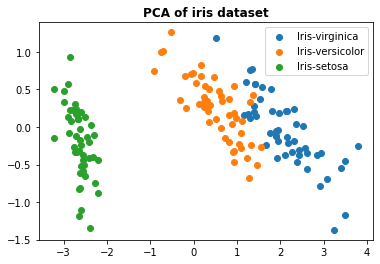

In [26]:
for label in set(y):
    X_class = X_new[y == label]
    plt.scatter(X_class.iloc[:, 0], X_class.iloc[:, 1], label=label)
    plt.title('PCA of iris dataset', weight = 'bold')
    plt.legend()

# EX4

In [27]:
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d  # noqa: F401
import pandas as pd
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [28]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
df

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
#df.target.replace({'Iris-setosa':0,'Iris-versicolor':1, 'Iris-virginica':2},inplace=True)

In [29]:
X = df.drop(['target'],axis=1)
y = df.target

In [30]:
pca = PCA()
X_new = pca.fit_transform(X)

In [31]:
pca=PCA(n_components=2)
X_new=pca.fit_transform(X)

In [33]:
X_new

array([[-2.68420713,  0.32660731],
       [-2.71539062, -0.16955685],
       [-2.88981954, -0.13734561],
       [-2.7464372 , -0.31112432],
       [-2.72859298,  0.33392456],
       [-2.27989736,  0.74778271],
       [-2.82089068, -0.08210451],
       [-2.62648199,  0.17040535],
       [-2.88795857, -0.57079803],
       [-2.67384469, -0.1066917 ],
       [-2.50652679,  0.65193501],
       [-2.61314272,  0.02152063],
       [-2.78743398, -0.22774019],
       [-3.22520045, -0.50327991],
       [-2.64354322,  1.1861949 ],
       [-2.38386932,  1.34475434],
       [-2.6225262 ,  0.81808967],
       [-2.64832273,  0.31913667],
       [-2.19907796,  0.87924409],
       [-2.58734619,  0.52047364],
       [-2.3105317 ,  0.39786782],
       [-2.54323491,  0.44003175],
       [-3.21585769,  0.14161557],
       [-2.30312854,  0.10552268],
       [-2.35617109, -0.03120959],
       [-2.50791723, -0.13905634],
       [-2.469056  ,  0.13788731],
       [-2.56239095,  0.37468456],
       [-2.63982127,

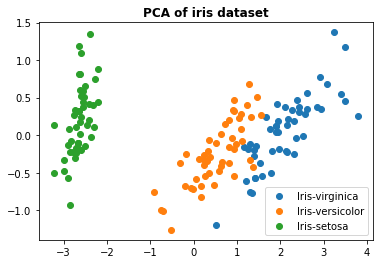

In [34]:
for label in set(y):
    X_class = X_new[y == label]
    plt.scatter(X_class[:, 0], X_class[:, 1], label=label)
    plt.title('PCA of iris dataset', weight = 'bold')
    plt.legend()